In [1]:
import pandas as pd

In [2]:
url=r'https://raw.githubusercontent.com/AkshaanB/Customer-Churn-Modelling-using-ANN/master/Churn_Modelling.csv?token=AMWGGDNNIGJMHO5MOBW52HK6X7E4W'

In [3]:
df_data = pd.read_csv(url)

In [4]:
df_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


***RowNumber, CustomerId, Surname doen't affect the dependent varibale. So, removing those from the dataframe***

In [5]:
df_data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [6]:
df_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df_data[df_data.isnull().any(axis=1)].count()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df_data_corr = df_data.corr()

In [10]:
df_data_corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

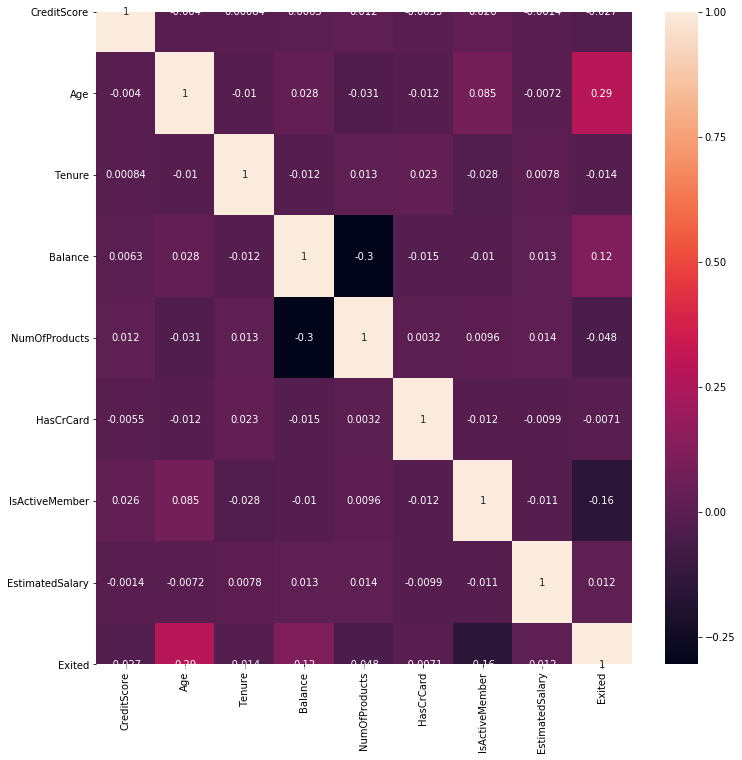

In [12]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_data_corr,annot=True)

In [13]:
from sklearn import preprocessing

In [14]:
label_encoder = preprocessing.LabelEncoder()

In [15]:
df_data['Gender'] = label_encoder.fit_transform(df_data['Gender'].astype(str))

In [16]:
df_data = pd.get_dummies(df_data,columns=['Geography'])

In [17]:
df_data.dtypes

CreditScore            int64
Gender                 int32
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [18]:
df_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [19]:
x = df_data.drop(['Exited'],axis=1)
y = df_data['Exited']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [22]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

**Standardizing the independent variables**

In [24]:
standardize = preprocessing.StandardScaler()

In [25]:
x_train = standardize.fit_transform(x_train)
x_test = standardize.fit_transform(x_test)

**Building the ANN model**

In [26]:
import keras

Using TensorFlow backend.


In [27]:
#Sequential needed to initialize the neural network
from keras.models import Sequential

In [28]:
#Dense needed to build the layers of ANN
from keras.layers import Dense

In [29]:
model = Sequential()

In [30]:
#Input layer and Hidden layer_1
model.add(Dense(output_dim=7, init='uniform', activation='relu', input_dim=12))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=12, units=7, kernel_initializer="uniform")`
  


In [31]:
#Hidden layer_2
model.add(Dense(output_dim=7, init='uniform', activation='relu'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=7, kernel_initializer="uniform")`
  


In [32]:
#Output layer
model.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [33]:
#Compiling the ANN
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(x_train, y_train, batch_size=10, nb_epoch=100)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
8000/8000 [==============================] - 1s 120us/step - loss: 0.4857 - accuracy: 0.7937
Epoch 2/100
8000/8000 [==============================] - 1s 87us/step - loss: 0.4304 - accuracy: 0.7940
Epoch 3/100
8000/8000 [==============================] - 1s 88us/step - loss: 0.4242 - accuracy: 0.8075 0s - loss: 0.4
Epoch 4/100
8000/8000 [==============================] - 1s 86us/step - loss: 0.4210 - accuracy: 0.8234
Epoch 5/100
8000/8000 [==============================] - 1s 86us/step - loss: 0.4186 - accuracy: 0.8269
Epoch 6/100
8000/8000 [==============================] - 1s 86us/step - loss: 0.4171 - accuracy: 0.8291
Epoch 7/100
8000/8000 [==============================] - 1s 87us/step - loss: 0.4152 - accuracy: 0.8294
Epoch 8/100
8000/8000 [==============================] - 1s 83us/step - loss: 0.4143 - accuracy: 0.8324
Epoch 9/100
8000/8000 [==============================] - 1s 82us/step - loss: 0.4131 - accuracy: 0.8320
Epoch 10/100
8000/8000 [========================

8000/8000 [==============================] - 1s 87us/step - loss: 0.4041 - accuracy: 0.8360
Epoch 78/100
8000/8000 [==============================] - 1s 87us/step - loss: 0.4038 - accuracy: 0.8365 0s - loss: 0
Epoch 79/100
8000/8000 [==============================] - 1s 89us/step - loss: 0.4042 - accuracy: 0.8349
Epoch 80/100
8000/8000 [==============================] - 1s 101us/step - loss: 0.4038 - accuracy: 0.8351
Epoch 81/100
8000/8000 [==============================] - 1s 102us/step - loss: 0.4041 - accuracy: 0.8330
Epoch 82/100
8000/8000 [==============================] - 1s 106us/step - loss: 0.4041 - accuracy: 0.8363
Epoch 83/100
8000/8000 [==============================] - 1s 110us/step - loss: 0.4037 - accuracy: 0.8364
Epoch 84/100
8000/8000 [==============================] - 1s 105us/step - loss: 0.4035 - accuracy: 0.8365
Epoch 85/100
8000/8000 [==============================] - 1s 90us/step - loss: 0.4035 - accuracy: 0.8361
Epoch 86/100
8000/8000 [==========================

In [35]:
y_pred = model.predict(x_test)

**Converting predicted results (probabilities) to Yes or No**

In [36]:
#wE DECIDE A THRESHOLD. So, 50% is fine
y_pred = (y_pred > 0.5)

In [37]:
y_pred

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [38]:
y_pred = label_encoder.fit_transform(y_pred.astype(str))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
results_df = pd.DataFrame({'actual': y_test,
                          'predict':y_pred})

In [40]:
results_crosstab = pd.crosstab(results_df['predict'],results_df['actual'])

In [41]:
results_crosstab

actual,0,1
predict,,
0,1554,250
1,57,139


In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1611
           1       0.71      0.36      0.48       389

    accuracy                           0.85      2000
   macro avg       0.79      0.66      0.69      2000
weighted avg       0.83      0.85      0.83      2000



***Predicting for some unseen data***

> *1*

In [52]:
data_to_predict = {'CreditScore':[600], 'Gender':[1], 'Age':[40], 'Tenure':[3], 'Balance':[60000.00], 'NumOfProducts':[2],'HasCrCard':[1],'IsActiveMember':[1],'EstimatedSalary':[50000.00],'Geography_France':[1],'Geography_Germany':[0],'Geography_Spain':[0]}

In [53]:
data_to_predict_df = pd.DataFrame(data_to_predict)

In [54]:
data_to_predict_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,600,1,40,3,60000.0,2,1,1,50000.0,1,0,0


In [56]:
data_to_predict_std = standardize.fit_transform(data_to_predict_df)

In [58]:
predictions = model.predict(data_to_predict_std)

In [60]:
predictions = (predictions > 0.5)

In [61]:
predictions

array([[False]])

> *2*

In [65]:
import numpy as np

In [66]:
predictions_2 = model.predict(standardize.fit_transform(np.array([[600, 0, 55, 2, 23456.78, 1, 1, 0, 7800.45, 0, 0, 1]])))

In [69]:
predictions_2 = (predictions_2 > 0.5)

In [70]:
predictions_2

array([False])